# TRỰC QUAN, PHÂN TÍCH VÀ DỰ ĐOÁN DOANH SỐ BÁN HÀNG CỦA MỘT SIÊU THỊ TẠI THỊ TRƯỜNG MỸ

Danh sách thành viên nhóm 1 - S2:

| MSSV | Họ và Tên |
| --- | :-- |
| 20133076 | Văn Mai Thanh Nhật |
| 20133082 | Huỳnh Minh Phước |
| 20133013 | Trần Nguyên Hạnh |
| 20133013 | Trần Đông |


## Phần 1.Nhập dữ liệu

In [149]:
#install requirements package
# pip install -r requirements.txt

In [150]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.ticker as ticker
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('train.csv') #Read the dataset

**Nhìn tổng quát dữ liệu**

In [152]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [153]:
df.describe() #Describing the data 

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Phần 2. Tiền xử lý
### 2.1 Chuẩn hóa dữ liệu

In [154]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

### 2.2 Xử lý dữ liệu bị thiếu

**Ma trận dữ liệu bị thiếu**

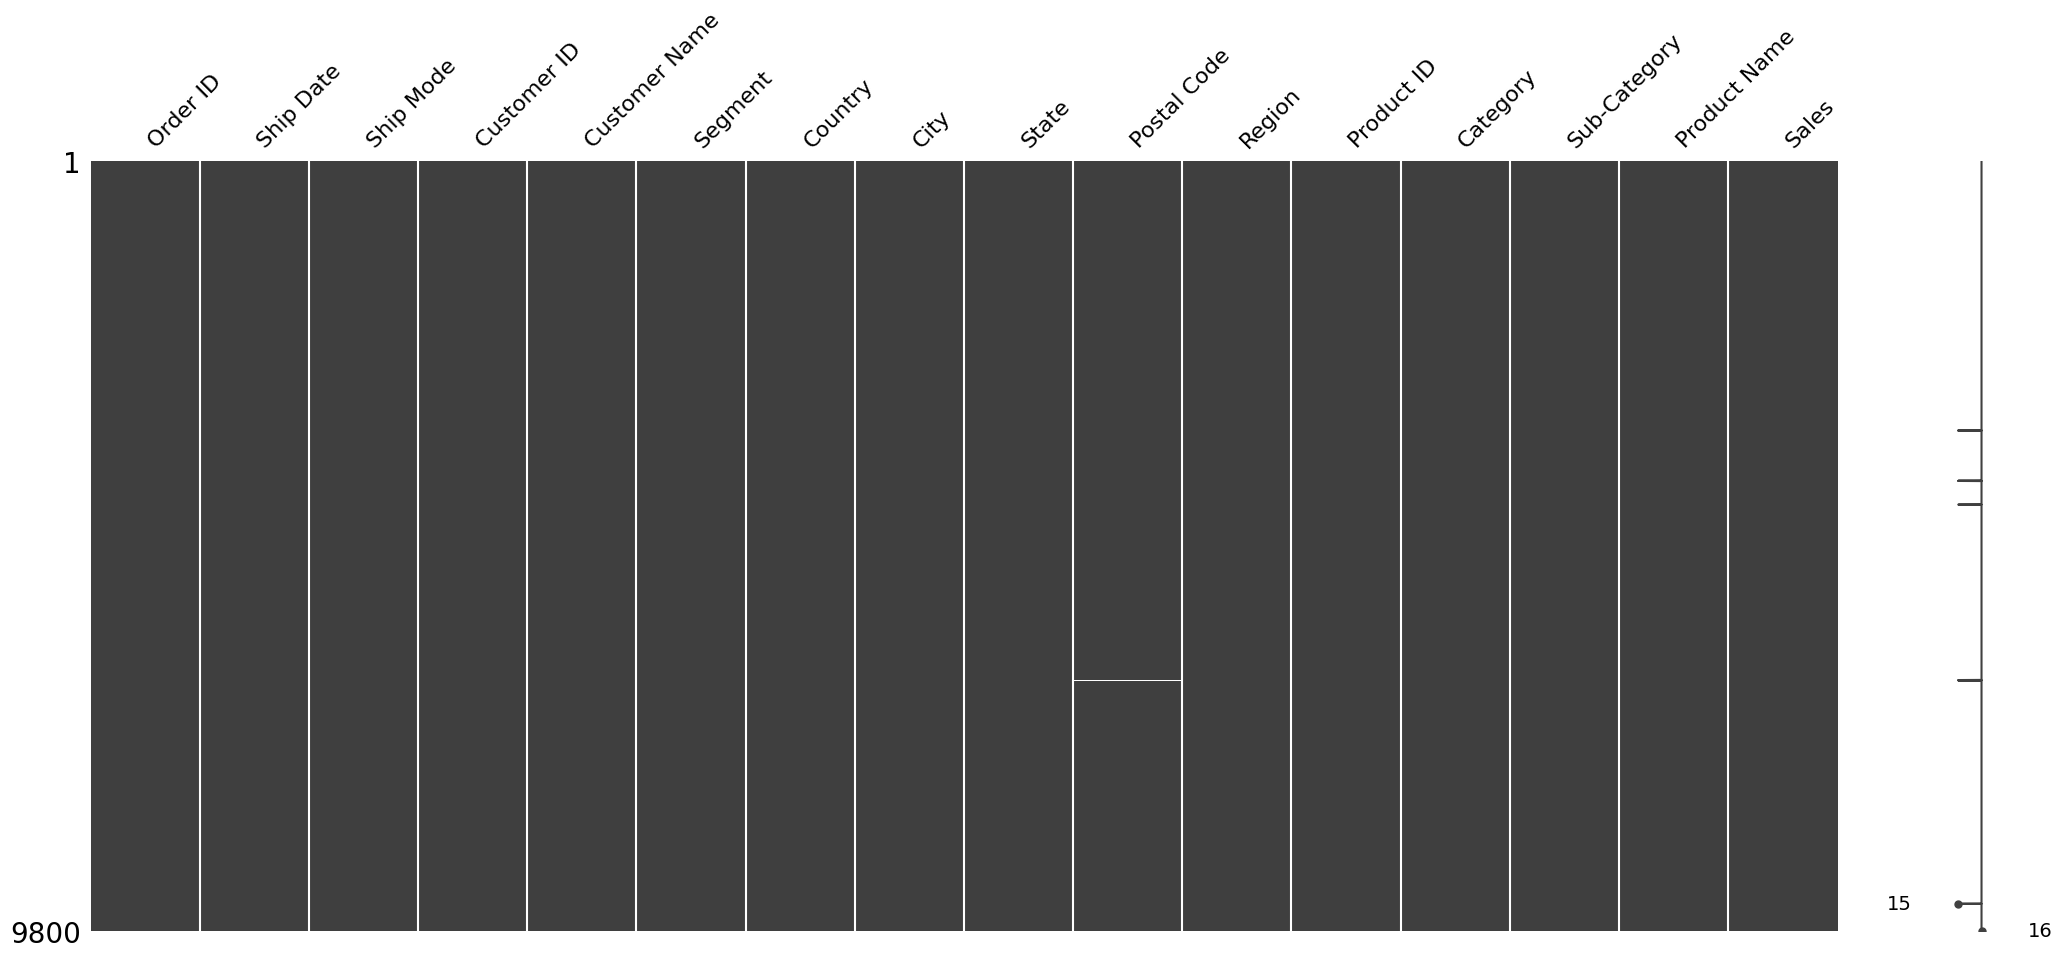

<Figure size 1500x900 with 0 Axes>

In [124]:
# BIỄU DIỄN NHỮNG THUỘC TÍNH BỊ THIẾU
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [125]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [126]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


**Xử lý dữ liệu bị thiếu**

In [127]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city

**Kiểm tra 1 lần nữa**

In [128]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


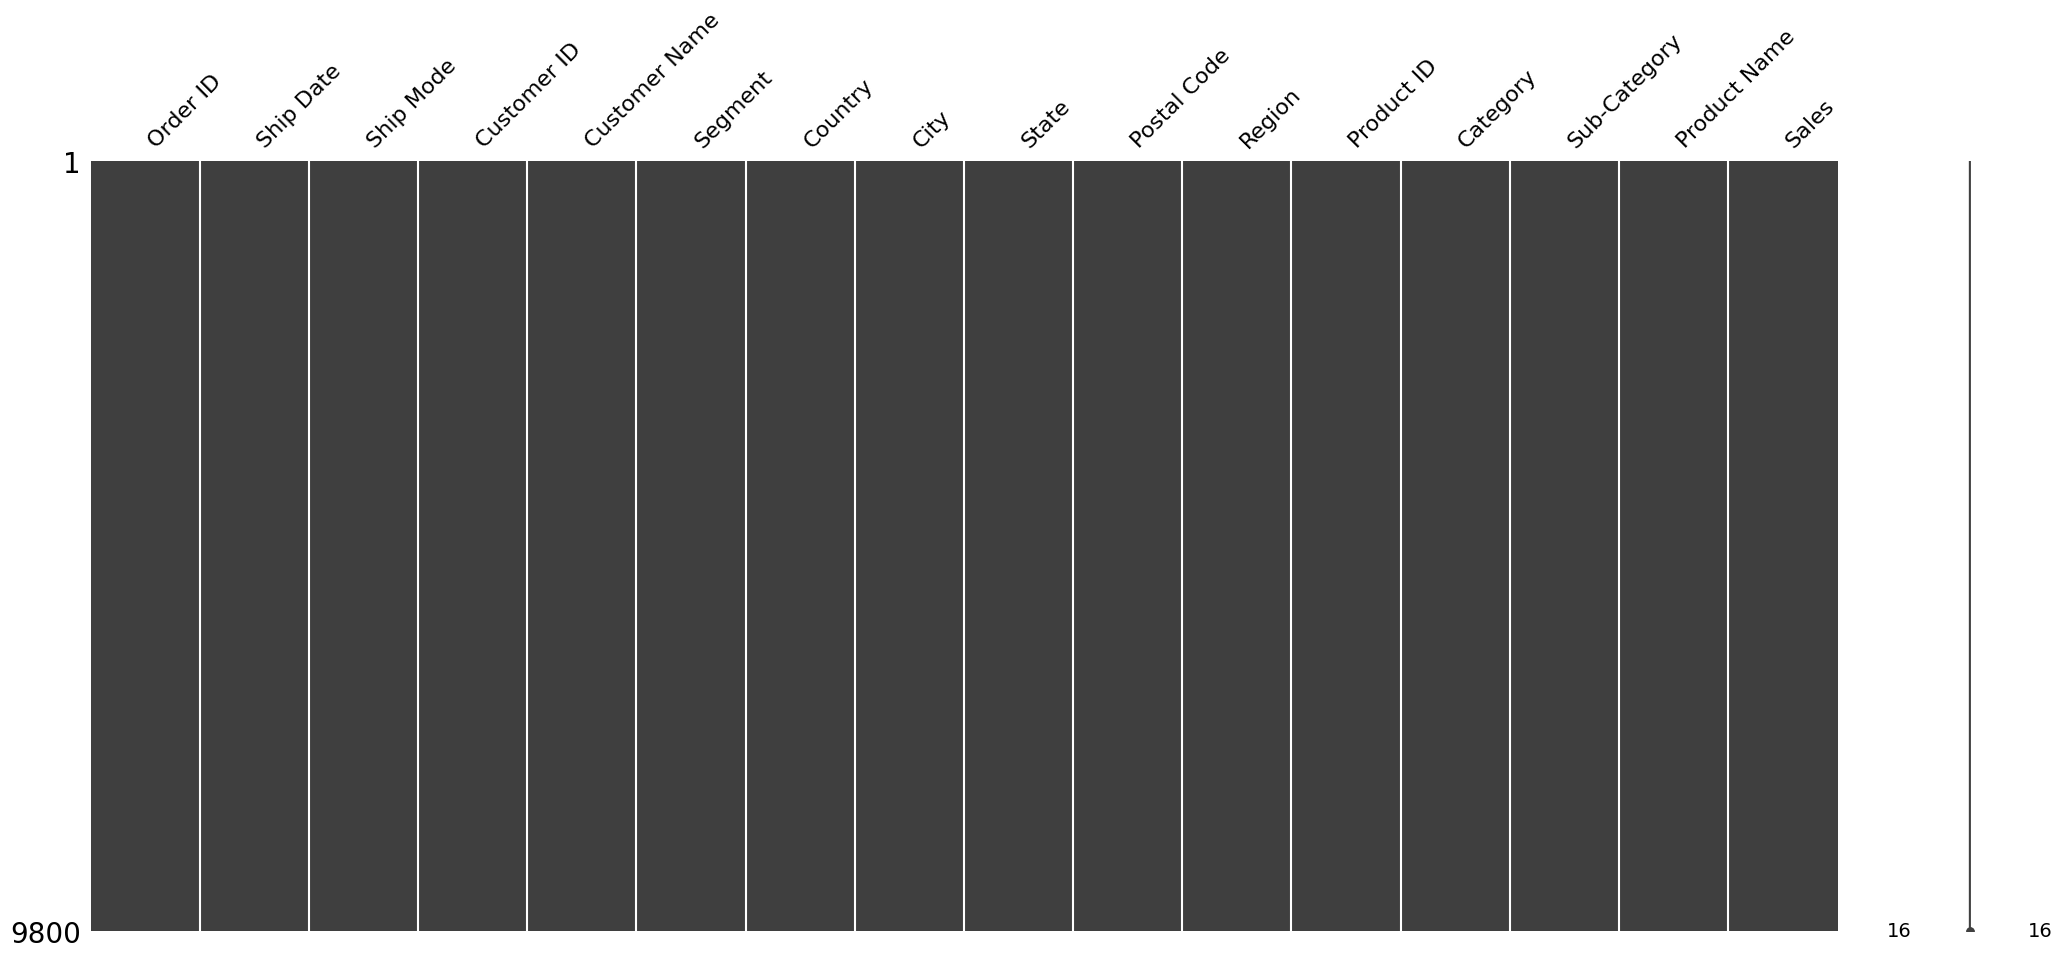

<Figure size 1500x900 with 0 Axes>

In [129]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

## Phần 3 - Trực quan hóa dữ liệu
### 3.1 Thống kê theo Khách hàng:

**Những Khách hàng có doanh số cao nhất**

In [130]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the Customers as per the sales
Top_customers = Top_customers[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_customers.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
# Top_customers.head()

In [131]:
import plotly.express as px
fig = px.bar(Top_customers, x = 'Customer Name', y = 'Sales', text_auto=True )
fig.show()

**Tỷ lệ doanh thu theo từng phân khúc khách hàng**

In [132]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) # Sort the segment as per the sales
Top_segment = Top_segment[["Sales"]] # keep only the sales column in the dataframe
Top_segment.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the segment column into the data frame
total_revenue_segement = Top_segment["Sales"].sum() # To find the total revenue generated as per segment
total_revenue_segement = str(int(total_revenue_segement)) # Convert the total_revenue_segment from float to int and then to string
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value
# Top_segment

In [133]:
fig = px.pie(Top_segment, labels='Segment', values='Sales', hole=.5, names = 'Segment')
# fig.update_layout(height = 800)
fig.show()

### 3.2 Thống kê theo vị trí địa lý:

**Những Tiểu bang có doanh số cao nhất**

In [134]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe
# Top_states.head()

In [135]:
import plotly.express as px
fig = px.bar(Top_states, x = 'State', y = 'Sales', text_auto=True )
fig.show()

**Những Thành phố có doanh số cao nhất**

In [136]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_cities.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the cities into the dataframe

In [137]:
import plotly.express as px
fig = px.bar(Top_cities, x = 'City', y = 'Sales', text_auto=True )
fig.show()

**Tỷ lệ doanh thu theo từng vùng miền**

In [138]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

In [139]:
fig = px.pie(Top_region, labels='Region', values='Sales', hole=.5, names = 'Region')
# fig.update_layout(height = 800)
fig.show()

**Tỷ lệ doanh thu theo từng phương thức vận chuyển**

In [140]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = Top_segment["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = str(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

In [141]:

fig = px.pie(Top_shipping, labels='Ship Mode', values='Sales', hole=.5, names = 'Ship Mode')
fig.update_layout(height = 800)
fig.show()

### 3.2 Thống kê theo thông tin sản phẩm:

**Những sản phẩm có doanh số cao nhất**

In [142]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(20) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = str(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products # Adding '$' sign before the Value
# Top_products

In [143]:
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=Top_products['Product Name'], values=Top_products['Sales'], hole=.5, pull=[0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],  )])
fig.show()

**Tỷ lệ doanh thu theo từng danh mục, danh mục phụ**

In [144]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index
# Top_subcat.head(10)

In [145]:
import plotly.graph_objects as go

# fig =go.Figure(go.Sunburst(
#     labels=Top_subcat['Category'],
#     parents=Top_subcat['Sub-Category'],
#     values=Top_subcat['Sales'],
# ))
# fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig = px.sunburst(Top_subcat, path=['Category', 'Sub-Category'], color='Sales', color_continuous_scale=px.colors.sequential.Greens, labels='Sales')

fig.show()

### 3.4 Bản đồ doanh thu từng tiêu bảng toàn nước Mỹ:

In [146]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [147]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [148]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

## Phần 4. Xây dựng mô hình dự đoán 

In [155]:
new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


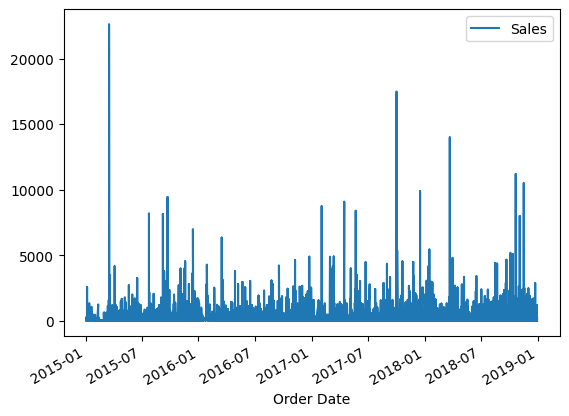

In [156]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();

### 4.2. Mô hình dự đoán chuỗi thời gian